# Exploring the Pandas library by studying a airbnb data set

### by Benfeard Williams
### on Oct 11, 2020

Dataset from Kaggle
> source: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

Notes for myself:
Series (columns) make up DataFrames (multi-dimensional table)
    pd.DataFrame(data as a dictionary)
Index (row number)

## Import libraries I want to work with

Pandas, numpy, and random for data manipulation. Matplotlib for graphs. Geopandas and shapely for mapping. Sys for internal testing.

In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import geopandas as gpd
from shapely.geometry import Point, Polygon

import random

import sys

## Import dataset and create dataframe

Things I practiced:

- Read the data from a CSV file
- Output to a new CSV file
- Look at a specific row (index)
- Look at the first 10 rows and last 2 rows
- Get essential details about the dataset such as # of entries, missing data, and the shape

In [40]:
# Read data from CSV
airbnb_df = pd.read_csv('AB_NYC_2019.csv')#, index_col = 0)

# Output after cleaning up the DataFrame
airbnb_df.to_csv('test_output.csv')

In [41]:
# Look at the 10th row
print(airbnb_df.loc[10])

id                                                            5295
name                              Beautiful 1br on Upper West Side
host_id                                                       7702
host_name                                                     Lena
neighbourhood_group                                      Manhattan
neighbourhood                                      Upper West Side
latitude                                                   40.8032
longitude                                                 -73.9655
room_type                                          Entire home/apt
price                                                          135
minimum_nights                                                   5
number_of_reviews                                               53
last_review                                             2019-06-22
reviews_per_month                                             0.43
calculated_host_listings_count                                

In [42]:
# Look at the first 10 rows and last 2 rows
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [43]:
airbnb_df.tail(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [44]:
# Get essential details about dataset
airbnb_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [45]:
airbnb_df.shape 

(48895, 16)

Now we know there 48895 entries is the maximum and we have missing data. And the shape of the dataframe is 48895 rows by 16 columns.

## Manipulate some data

Things I practiced:

- Getting rid of duplicate rows
- Exploring the columns
- Changing column names
- Checking for null values

In [46]:
# This can be used to get rid of duplicates
# inplace modifies the DataFrame instead of creating a new one
airbnb_df.drop_duplicates(inplace=True) 
airbnb_df.shape

(48895, 16)

In [47]:
# Exploring the columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [48]:
# Let's change column names for practice
airbnb_df.rename(columns={
    'name':'property_name',
    'last_review':'last_review_date',
    'neighbourhood_group':'nyc_borough'
}, inplace=True)
airbnb_df.columns 

Index(['id', 'property_name', 'host_id', 'host_name', 'nyc_borough',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review_date',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [49]:
# Looking for null values in the DataFrame
airbnb_df.isnull().sum()

id                                    0
property_name                        16
host_id                               0
host_name                            21
nyc_borough                           0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review_date                  10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

No duplicates, as I expcted. This is a cleaned up dataset from Kaggle. The creator already gave this dataset easy to understand names. I confirmed my changes the column names. I now how many null values are in each column. 16 properties lack a name, 21 lack a name for the host, and 10052 lack reviews and thus a last review date.

## Play with some of the numbers in the dataset

Things I practiced:

- Applying functions like mean() to a column
- Describing data to see continuous vs categorical variables
- Checking for correlations between continuous variables
- Create a function and apply it to a column

In [59]:
# random math
review_count = airbnb_df['number_of_reviews']
review_mean = review_count.mean()
review_mean

23.274465691788528

In [51]:
# gathering details on continuous data and categorical variables
airbnb_df.describe() 

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [52]:
airbnb_df['nyc_borough'].describe()

count         48895
unique            5
top       Manhattan
freq          21661
Name: nyc_borough, dtype: object

In [53]:
airbnb_df['neighbourhood'].value_counts().head(5)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

In [60]:
# We can see how correlated the continuous variables are
airbnb_df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [55]:
# applying a function to a DataFrame
def cost_more(x):
    if x > 500:
        return "Whoa, this listing costs MORE than $500 per night!"
    else:
        return "Whew, this listing costs LESS than $500 per night!"

price_check = airbnb_df["price"].apply(cost_more) # creates a new series
price_check.head(5)

0    Whew, this listing costs LESS than $500 per ni...
1    Whew, this listing costs LESS than $500 per ni...
2    Whew, this listing costs LESS than $500 per ni...
3    Whew, this listing costs LESS than $500 per ni...
4    Whew, this listing costs LESS than $500 per ni...
Name: price, dtype: object

I now know the average number of reviews per listing is 23. Describe tells me the largest host ID number is 274321313, but is that interesting? Describe tells me that Manhattan has the most abundant AirBnB listings which makes sense because it's the hub of NYC! Value_counts() let's me look at the 5 neighborhoods with the most listings. Correlation relationships can be hard to interpret in general and I'm not sure why would I want to correlate host ID number to how many days a year the listing was available. But I do know how to do it! My new function let's me know the first 5 rows in my dataframe are for listings that cost less than $500 per night.

## Make some plots

Things I practiced:

- Scatter plots
- Histograms
- Box plots

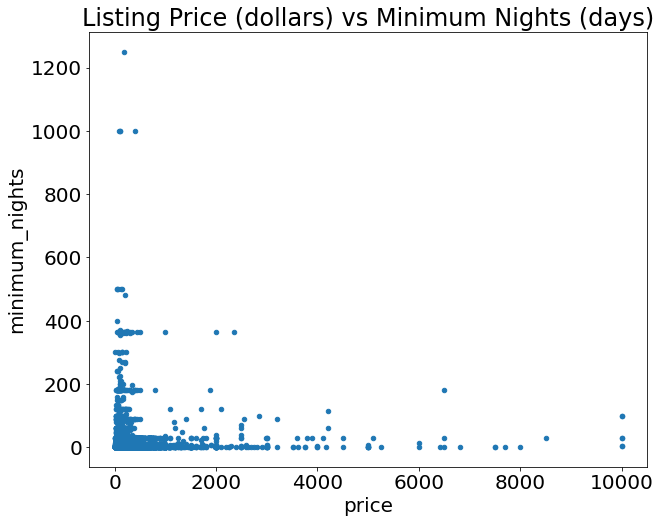

In [63]:
# Standardize font and plot size
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

# Scatter plot
airbnb_df.plot(kind='scatter', x='price', y='minimum_nights', title='Listing Price (dollars) vs Minimum Nights (days)');

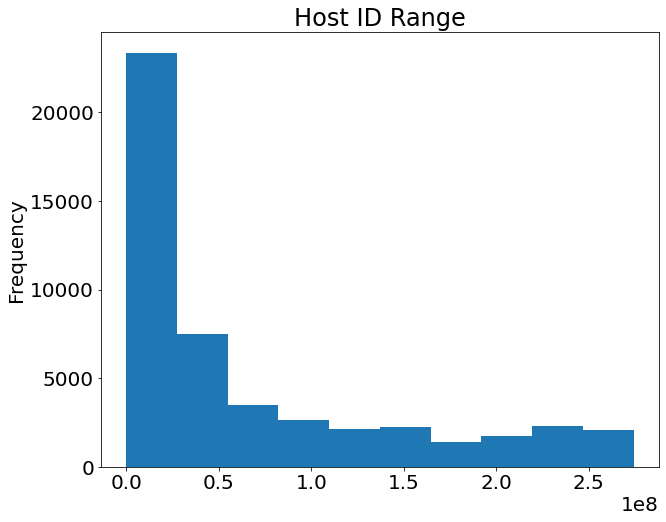

In [67]:
# Histogram
airbnb_df['host_id'].plot(kind='hist', title='Host ID Range');

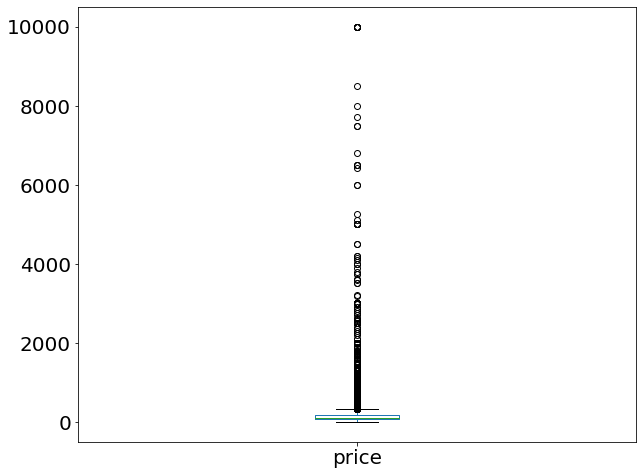

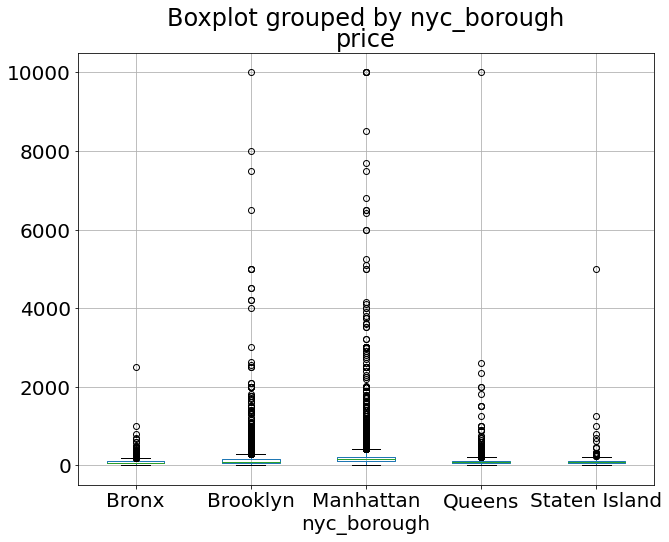

In [69]:
# Boxplot
airbnb_df['price'].plot(kind='box')

# Boxplot with categorical data
airbnb_df.boxplot(column='price', by='nyc_borough');

Why do some listings have a crazy amount of minimum nights for a stay like 999 or 1250 days? Are these rental properties? The host ideas come a nice size range. I wonder if they are assigned in order that the hosts joined Airbnb.So there are a lot of outliers when it comes to price everywhere in NYC...

## Visualize the data on a map

Things I practiced:

- Mapping latitude and longitude data using geopandas dataframes
- Import street map data from .shp files
    - map data from https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
- Plot the latitude and longitude on a map

In [56]:
# make a DataFrame for mapping
map_df = airbnb_df[['latitude', 'longitude', 'availability_365']]

# import street map
street_map = gpd.read_file('/Users/benfeard/Desktop/Data Science/Pandas Tutorial/geo_export_ce711959-057f-4980-af5c-2b3bb1596a76.shp')

# designate coordinate system
crs = {'init': 'epsg:4326'}

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(map_df['longitude'], map_df['latitude'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(map_df, crs = crs, geometry = geometry)

/Users/benfeard/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


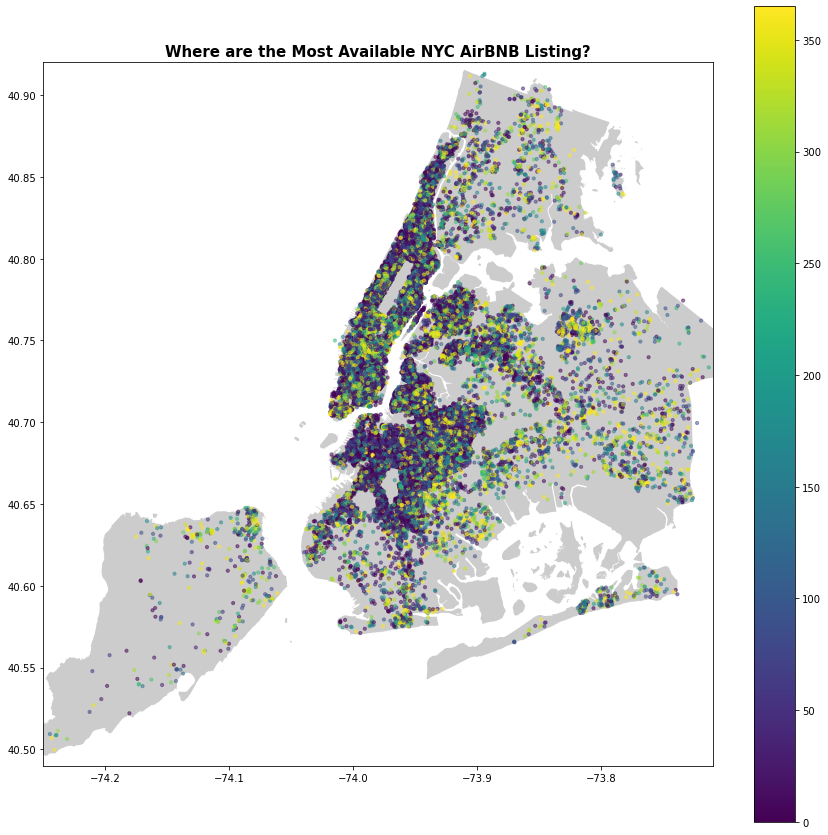

In [57]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))

# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')

# add geodataframe to axes
# assign 'price' variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='availability_365',ax=ax,alpha=0.5, legend=True,markersize=10)

# add title to graph
plt.title('Where are the Most Available NYC AirBNB Listing?', fontsize=15,fontweight='bold')

# set latitiude and longitude boundaries for map display
plt.xlim(-74.25,-73.71)
plt.ylim( 40.49,40.92)

# show map
plt.show()

/Users/benfeard/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


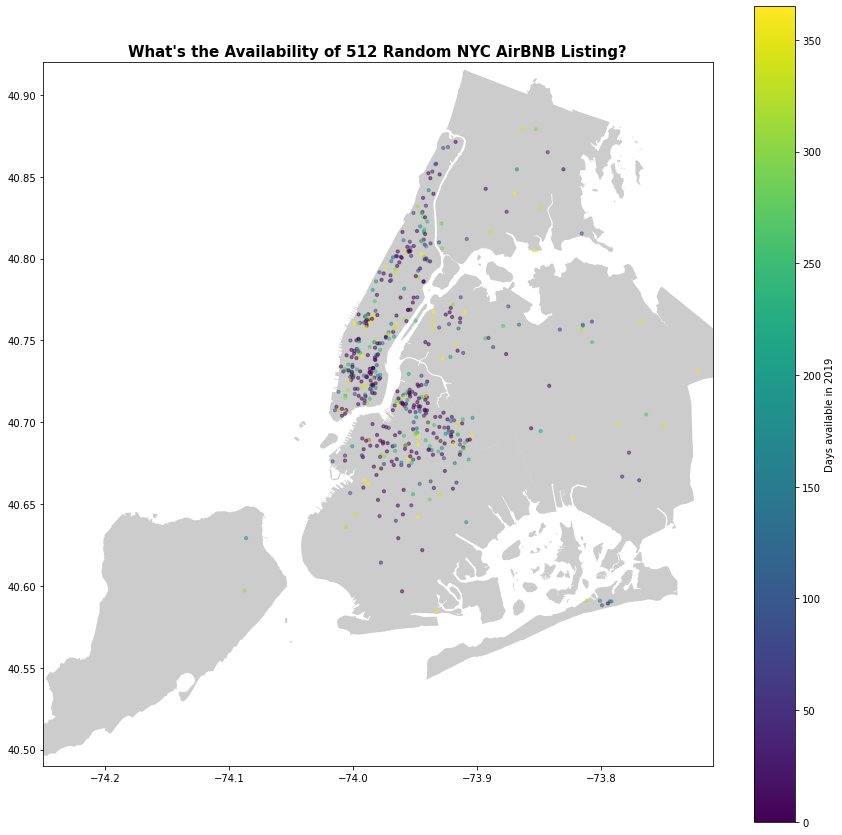

In [62]:
# this is a lot of points so let's draw 256 random points
random.seed(1)
selected_rows = random.sample(range(0,48895), 512)
map_df = map_df.loc[selected_rows]
geometry = [Point(xy) for xy in zip(map_df['longitude'], map_df['latitude'])]
geo_df = gpd.GeoDataFrame(map_df, crs = crs, geometry = geometry)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4,color='grey')

# create the colorbar
norm = colors.Normalize(vmin=geo_df.availability_365.min(), vmax=geo_df.availability_365.max())
cbar = plt.cm.ScalarMappable(norm=norm)

geo_df.plot(column='availability_365',ax=ax,alpha=0.5,legend=False,markersize=10)
plt.xlim(-74.25,-73.71)
plt.ylim( 40.49,40.92)

# add title to graph
plt.title("What's the Availability of 512 Random NYC AirBNB Listing?", fontsize=15,fontweight='bold')

# add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax)
# add label for the colorbar
ax_cbar.set_label('Days available in 2019')

plt.show()

Sometimes you have too many data points to visual. Usually I would select them based on a meaningful criteria but for this exercise, I'll use a random number (that we can all share with the same seed).